In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_salaries.csv')

In [9]:
print(df)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

1. Salario medio por nivel de experiencia

In [10]:
salario_medio_experiencia = df.groupby('experience_level')['salary'].mean().reset_index()

In [11]:
print("Salario medio por nivel de experiencia:\n", salario_medio_experiencia)

Salario medio por nivel de experiencia:
   experience_level         salary
0               EN  264622.454545
1               EX  427072.115385
2               MI  480617.690141
3               SE  213949.353571


2. Cantidad de empleados por nivel de experiencia

In [12]:
cantidad_empleados_experiencia = df['experience_level'].value_counts().reset_index()

In [13]:
cantidad_empleados_experiencia.columns = ['experience_level', 'Cantidad']

In [14]:
print("\nCantidad de empleados por nivel de experiencia:\n", cantidad_empleados_experiencia)


Cantidad de empleados por nivel de experiencia:
   experience_level  Cantidad
0               SE       280
1               MI       213
2               EN        88
3               EX        26


3. Cargo que más empleados tiene por nivel de experiencia

In [15]:
cargo_mas_empleados_experiencia = df.groupby(['experience_level', 'job_title']).size().reset_index(name='Cantidad')

In [16]:
cargo_mas_empleados_experiencia = cargo_mas_empleados_experiencia.loc[cargo_mas_empleados_experiencia.groupby('experience_level')['Cantidad'].idxmax()].reset_index(drop=True)

In [17]:
print("\nCargo que más empleados tiene por nivel de experiencia:\n", cargo_mas_empleados_experiencia)


Cargo que más empleados tiene por nivel de experiencia:
   experience_level                 job_title  Cantidad
0               EN            Data Scientist        22
1               EX  Director of Data Science         6
2               MI            Data Scientist        60
3               SE             Data Engineer        63


4. Salario medio por los tres cargos más representativos

In [18]:
cargos_representativos = df['job_title'].value_counts().head(3).index

In [19]:
salario_medio_cargos = df[df['job_title'].isin(cargos_representativos)].groupby('job_title')['salary'].mean().reset_index()

In [20]:
print("\nSalario medio por los tres cargos más representativos:\n", salario_medio_cargos)


Salario medio por los tres cargos más representativos:
         job_title         salary
0    Data Analyst   96604.958763
1   Data Engineer  179210.553030
2  Data Scientist  508347.202797


5. Salario más alto y salario más bajo por nivel de experiencia

In [21]:
salario_extremos_experiencia = df.groupby('experience_level')['salary'].agg(['max', 'min']).reset_index()

In [22]:
print("\nSalario más alto y salario más bajo por nivel de experiencia:\n", salario_extremos_experiencia)


Salario más alto y salario más bajo por nivel de experiencia:
   experience_level       max    min
0               EN   4450000   4000
1               EX   6000000  59000
2               MI  30400000   4000
3               SE   7000000  24000


6. Contar cuantos empleados hay por cargo

In [23]:
cantidad_empleados_cargo = df['job_title'].value_counts().reset_index()

In [24]:
cantidad_empleados_cargo.columns = ['job_title', 'Cantidad']

In [25]:
print("\nCantidad de empleados por cargo:\n", cantidad_empleados_cargo)


Cantidad de empleados por cargo:
                                    job_title  Cantidad
0                             Data Scientist       143
1                              Data Engineer       132
2                               Data Analyst        97
3                  Machine Learning Engineer        41
4                         Research Scientist        16
5                       Data Science Manager        12
6                             Data Architect        11
7                          Big Data Engineer         8
8                 Machine Learning Scientist         8
9                   Principal Data Scientist         7
10                              AI Scientist         7
11                   Data Science Consultant         7
12                  Director of Data Science         7
13                    Data Analytics Manager         7
14                               ML Engineer         6
15                  Computer Vision Engineer         6
16                           B

7. Cuantos empleados ganan un salario mayor a la media

In [26]:
salario_medio_global = df['salary'].mean()

In [27]:
empleados_mayor_media = df[df['salary'] > salario_medio_global].shape[0]

In [28]:
print("\nCantidad de empleados que ganan un salario mayor a la media: ", empleados_mayor_media)


Cantidad de empleados que ganan un salario mayor a la media:  43


graficas


In [29]:
import matplotlib.pyplot as plt

In [30]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


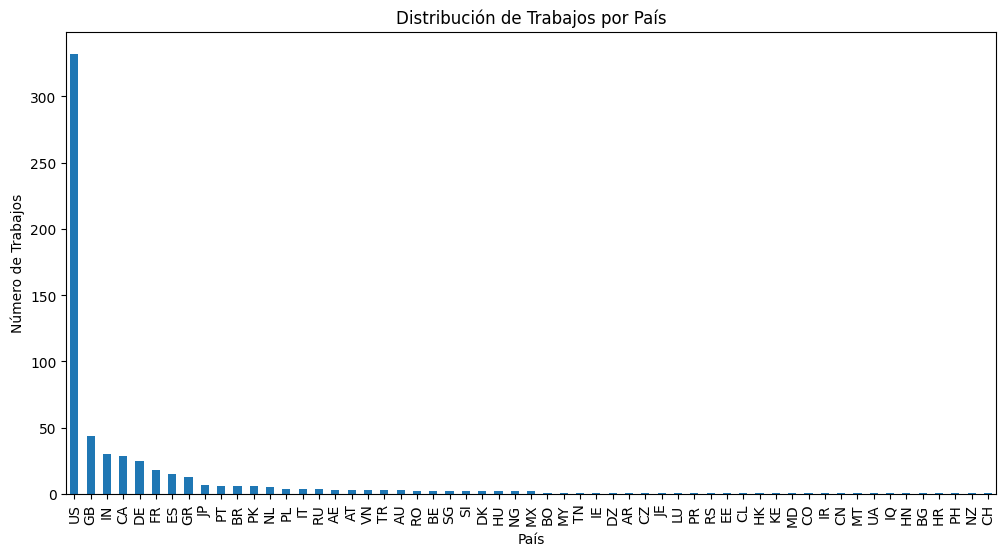

In [32]:
plt.figure(figsize=(12, 6))
df['employee_residence'].value_counts().plot(kind='bar')
plt.title('Distribución de Trabajos por País')
plt.xlabel('País')
plt.ylabel('Número de Trabajos')
plt.show()

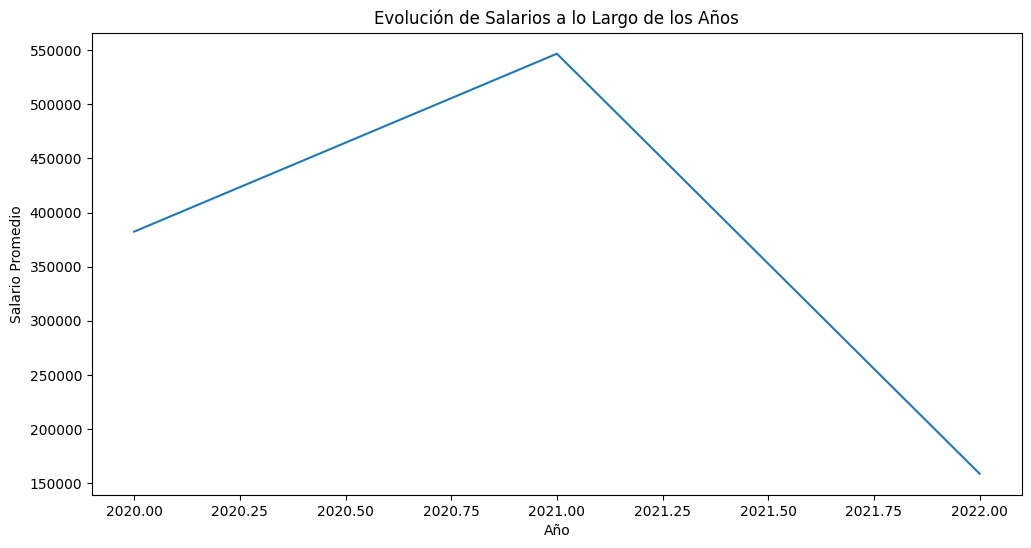

In [34]:
plt.figure(figsize=(12, 6))
df.groupby('work_year')['salary'].mean().plot(kind='line')
plt.title('Evolución de Salarios a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Salario Promedio')
plt.show()